<a href="https://colab.research.google.com/github/adityayadav4507/20-Days-of-stats-prob/blob/main/11_Day_one_way_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import scipy.stats as stats

f_statistic= 1.4 # the F-stastic value you'have calculated
df1=2
df2=6
df=8

p_value=stats.f.sf(f_statistic, df1, df2)
print(p_value)

0.31696093163035305


In [12]:
import pandas as pd
import numpy as np

df=pd.read_csv('/content/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# post-hoc test

# 1. Benferroni correction test


In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model=ols('Pclass~Fare', data=df).fit()

sm.stats.anova_lm(model,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
Fare,1.0,187.850073,187.850073,384.547434,1.967386e-71
Residual,889.0,434.273383,0.488496,NaN,NaN


In [14]:
# which one is faar from the mean

import scipy.stats as stats

for class1,class2 in [(1,2),(2,3),(3,1)]:
  print(class1,class2)
  print(stats.ttest_ind(df[df['Pclass']==class1]['Fare'],df[df['Pclass']==class2]['Fare']))



1 2
TtestResult(statistic=np.float64(10.851594207309702), pvalue=np.float64(3.303644173119574e-24), df=np.float64(398.0))
2 3
TtestResult(statistic=np.float64(6.600620525446866), pvalue=np.float64(8.304239675888693e-11), df=np.float64(673.0))
3 1
TtestResult(statistic=np.float64(-19.448650285047485), pvalue=np.float64(8.908959353672071e-68), df=np.float64(705.0))


In [15]:
df[df['Pclass']==1]['Fare'].mean()

np.float64(84.1546875)

In [16]:
df[df['Pclass']==2]['Fare'].mean()

np.float64(20.662183152173913)

In [17]:
df[df['Pclass']==3]['Fare'].mean()

np.float64(13.675550101832993)

# 2. Tukeys HSD test

,0,1,2,3,4,5,6
0,group1,group2,meandiff,p-adj,lower,upper,reject
1,1,2,-63.4925,0.0,-72.9165,-54.0685,True
2,1,3,-70.4791,0.0,-78.1489,-62.8094,True
3,2,3,-6.9866,0.108,-15.1064,1.1331,False


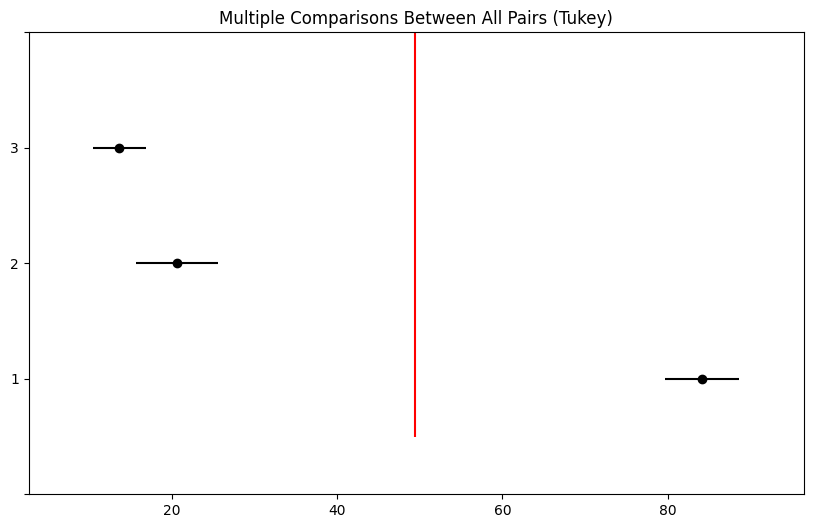

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

tukey=pairwise_tukeyhsd(endog=df['Fare'],groups=df['Pclass'],alpha=0.05)
tukey.plot_simultaneous()

plt.vlines(x=49.4, ymin=-0.5,ymax=4.5, color='red')

pd.DataFrame(tukey.summary())